In [120]:
import numpy as np
from scipy.io import loadmat  # this is the SciPy module that loads mat-files
import matplotlib.pyplot as plt
import pandas as pd
from sympy.solvers import solve
from sympy import Symbol

In [121]:
mat = loadmat('positions1.mat')
mdata = mat['data']
mdata = mdata.reshape(1000,1)
mdata = pd.DataFrame(data=mdata, columns = ["actual_position"])
mdata['predicted_position'] = 0


In [122]:
#question a. alpha = 0.1
alpha = 0.1
# calculation of predicted position by using formula x_predicted(n+1) = X_actual(n) + alpha*(X_actual(n - X_actual(n-1)))
for i in range(1,999):
    mdata["predicted_position"].iloc[[i+1]] = mdata['actual_position'].iloc[i] + alpha*(mdata['actual_position'].iloc[i] - mdata['actual_position'].iloc[i-1])
mdata


,actual_position,predicted_position
0,0.000000,0.000000
1,-0.195862,0.000000
2,-0.545760,-0.215449
3,0.232526,-0.580750
4,-0.284158,0.310355
...,...,...
995,0.671835,1.009479
996,1.628735,0.643215
997,2.165573,1.724426
998,2.113692,2.219257


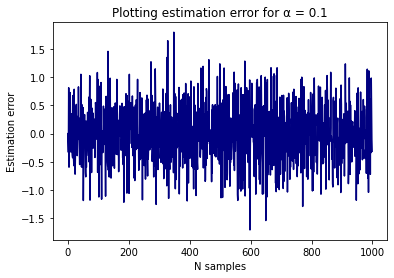

In [123]:
# calcualte the estimation error ε(n+1) for alpha 0.1
mdata['estimation_error'] = mdata['actual_position'] - mdata['predicted_position']
fig = plt.figure()
ax = mdata['estimation_error'].plot(colormap='jet', title='Plotting estimation error for α = 0.1')
ax.set_xlabel('N samples')
ax.set_ylabel('Estimation error')
ax = fig.add_subplot(ax)
fig.savefig('Question_a.png')

In [124]:
# question 2. Estimate the variance of position estimation error for different alpha 
# values (alpha = -1.00, -0.99 .... 0.99, 1.00) and plot the resulting relation between 
# alpha and the estimated variance of position.
# estimted variance of error ε(n+1) is equal to E[(actual_position(n+1)-predicted_position(n+1)^2)]
variance_means = [] # list to keep track of the means variance for each alpha.
alphas = np.linspace(-1,1,201) # create an array with -1 to 1.
for alpha in alphas:
    for i in range (1,999):
        mdata["predicted_position"].iloc[[i+1]] = mdata['actual_position'].iloc[i] + alpha*(mdata['actual_position'].iloc[i] - mdata['actual_position'].iloc[i-1])
    mdata['estimation_error'] = mdata['actual_position'] - mdata['predicted_position']
    mdata['estimate_variance_position'] = mdata['estimation_error'] ** 2 # get the error square (estimated variance)
    variance_means.append(mdata['estimate_variance_position'].mean())



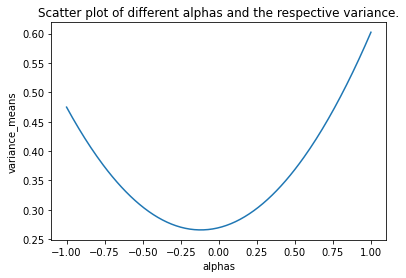

In [125]:
# plot the scatter plot of different alpha values and each variance_mean.
colors = np.random.rand(len(alphas))
plt.plot(alphas, variance_means)
plt.title('Scatter plot of different alphas and the respective variance.')
plt.xlabel('alphas')
plt.ylabel('variance_means')
plt.savefig('Question_b.png')
plt.show()

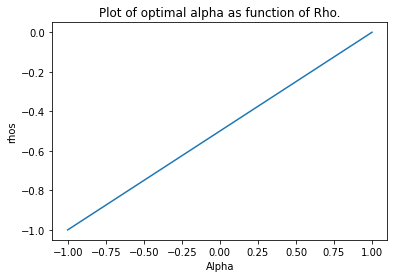

In [126]:
#question  e. 
rhos = np.linspace(-1,1,201) # create an array with -1 to 1.
calc_a = []
for rho in rhos:
    calc_a.append((rho-1) / 2)
# plot the scatter plot of different alpha values and each variance_mean.
plt.plot(rhos, calc_a)
plt.title('Plot of optimal alpha as function of Rho.')
plt.xlabel('Alpha')
plt.ylabel('rhos')
plt.savefig('Question_e.png')
plt.show()

In [127]:
#question f. (6) for k = 1, rho = 0.8686
# for k = 2, rho = 
sum = 0
k = 2
for i in range(1,len(mdata)- k):
    sum += mdata['actual_position'].iloc[i]* mdata['actual_position'].iloc[i+k]
acf = sum/len(mdata)
print(acf)
print(mdata['actual_position'].var())
rho = acf/mdata['actual_position'].var()
print(rho)

0.8005967705204181
1.042480517753764
0.7679728847551669


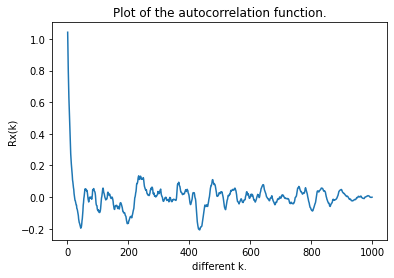

In [128]:
#question g. 
Acf = []
kappas = np.linspace(1,999,999)
for k in range(0,len(mdata) - 1):
    sum = 0
    for i in range(1,len(mdata)-k):
        sum += mdata['actual_position'].iloc[i]* mdata['actual_position'].iloc[i+k]
    Acf.append((sum/len(mdata)))

#plot autocorrelation function
plt.plot(kappas, Acf)
plt.title('Plot of the autocorrelation function.')
plt.xlabel('different k.')
plt.ylabel('Rx(k)')
plt.savefig('Question_g.png')
plt.show()



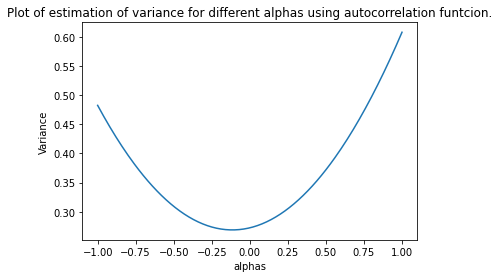

In [129]:
#question h.
alphas = np.linspace(-1,1,201)
variances = []
for alpha in alphas:
    variances.append((2+2*alpha+2*alpha**2)* Acf[0] + (-2-4*alpha-2*alpha**2)*Acf[1] + 2*alpha*Acf[2])
#plot the variance of position estimation error as a function of alpha.
plt.plot(alphas, variances)
plt.title('Plot of estimation of variance for different alphas using autocorrelation funtcion.')
plt.xlabel('alphas')
plt.ylabel('Variance')
plt.savefig('Question_h.png')
plt.show()

In [130]:
#question i.
from sympy.solvers import solve
from sympy import Symbol
a = Symbol('a')
solve((4*a+2) * Acf[0] + (-4*a-4) * Acf[1] + 2 * Acf[2],a)


[-0.114969804997615]